<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 1. Métodos de particionamiento: caso práctico sobre segmentación de clientes

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

## Introduccion

Este conjunto de datos se crea solo con el propósito de aprender los conceptos de segmentación de clientes, también conocidos como análisis de la cesta de la compra. Lo demostraré utilizando la técnica de ML no supervisada (Algoritmo de agrupación de KMeans) en la forma más simple.

## Informacion de los atributos

Algunos datos básicos sobre sus clientes, son:

1) CustomerID-ID única asignada al cliente

2) Gender-Género del cliente

3) Age-Edad del cliente

4) Annual Income (k)-Ingresos anuales 

5) Spending Score (1-100)-Puntaje de gastos (El puntaje de gasto es algo que asigna al cliente en función de sus parámetros definidos, como el comportamiento del cliente y los datos de compra.)


## Fuente

#### https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import pandas as pd

In [23]:
# importing the dataset
data = pd.read_csv('D:/Python/2. Nivel II/2/datos/Mall_Customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Female    112
Male       88
Name: Gender, dtype: int64

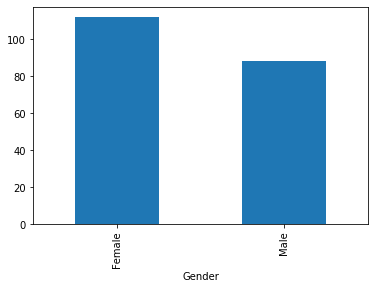

In [4]:
data.groupby('Gender').size().plot(kind='bar')
pd.value_counts(data['Gender'])

In [5]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

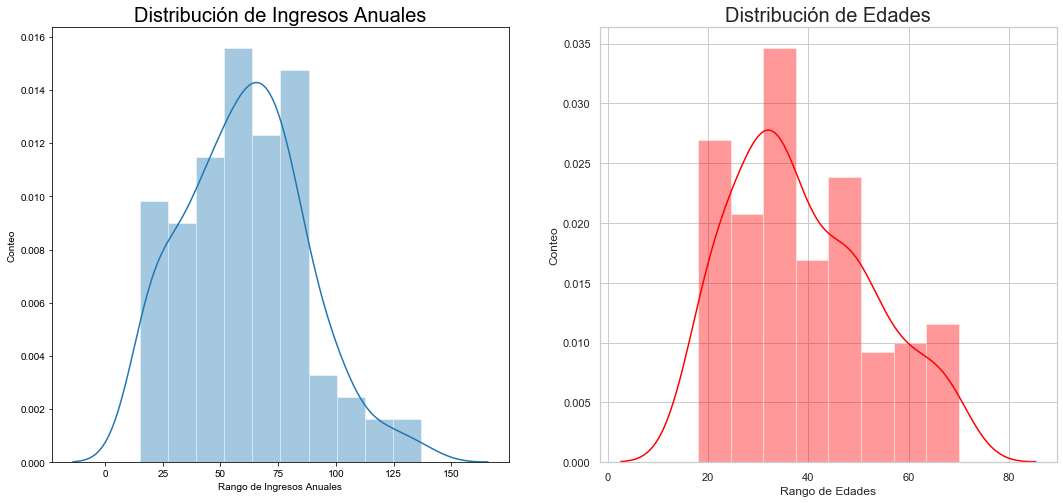

In [6]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribución de Ingresos Anuales', fontsize = 20)
plt.xlabel('Rango de Ingresos Anuales')
plt.ylabel('Conteo')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribución de Edades', fontsize = 20)
plt.xlabel('Rango de Edades')
plt.ylabel('Conteo')
plt.show()

## Interpretación:

#### La mayoría de las personas ganan alrededor de 50-75 dólares estadounidenses.
#### Los clientes más habituales del centro comercial tienen entre 30 y 35 años.
#### Los jóvenes son menores en número en comparación con las personas de mediana edad.

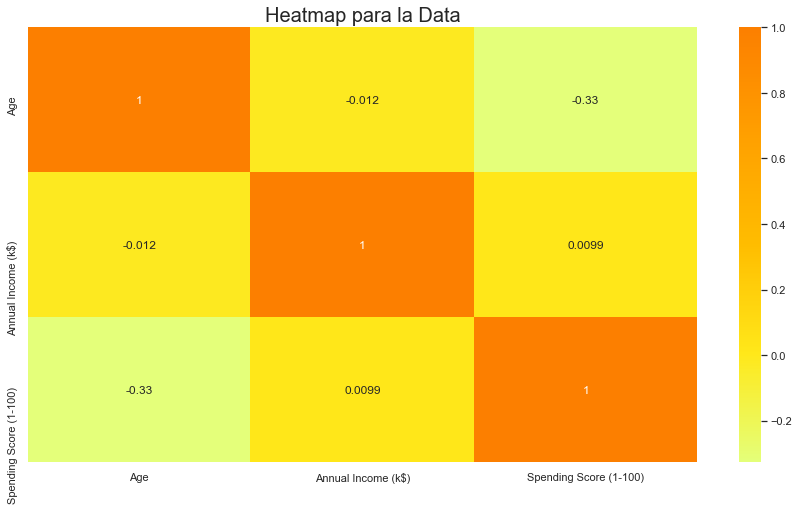

In [22]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap para la Data', fontsize = 20)
plt.show()

In [24]:
x = data.iloc[:, [3, 4]].values

## Método de Codo para encontar el número óptimo de clusters

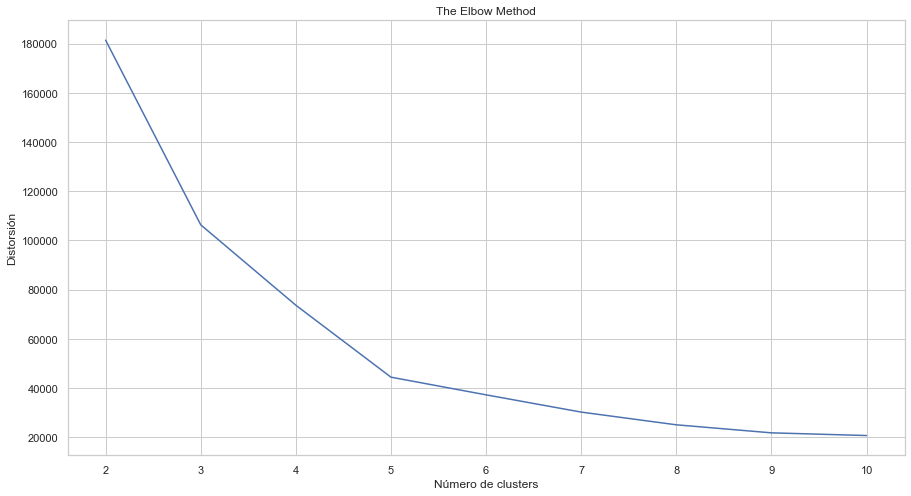

In [25]:
from sklearn.cluster import KMeans
cs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

In [12]:
cs

[181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

## Método de Silueta para encontar el número óptimo de clusters

In [26]:
from sklearn.metrics import euclidean_distances, silhouette_score

Text(0.5, 1.0, 'Silouette para data clientes')

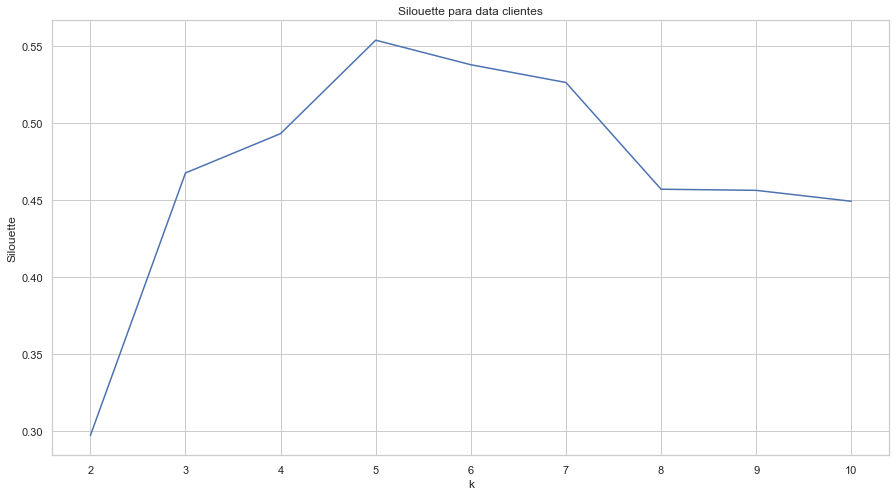

In [27]:
sil = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    sil.append(silhouette_score(x, kmeans.fit_predict(x)))

plt.plot(range(2, 11),sil)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data clientes")

In [28]:
sil

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5264283703685728,
 0.45704384633565154,
 0.4563032021725485,
 0.4492169169017592]

## Visualización de Clusters

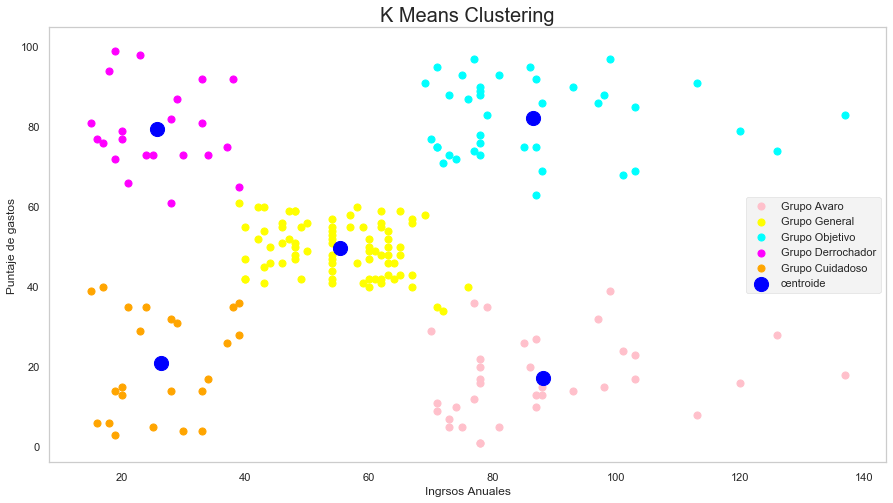

In [29]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], #en filas seleccionamos las observaciones donde y_means (etiqueta de clúster) es 0
            x[y_means == 0, 1], 
            s = 50, #tamaño de los puntos de las observaciones
            c = 'pink', #color
            label = 'Grupo Avaro')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow', label = 'Grupo General')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan', label = 'Grupo Objetivo')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta', label = 'Grupo Derrochador')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange', label = 'Grupo Cuidadoso')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centroide')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Ingrsos Anuales')
plt.ylabel('Puntaje de gastos')
plt.legend()
plt.grid()
plt.show()

## Perfilamiento de Clúster

In [30]:
y_means = km.fit_predict(x)

In [31]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [32]:
cl_k_means= pd.DataFrame(y_means, columns=["clúster_kmeans"])
cl_k_means.head()

,clúster_kmeans
0,4
1,3
2,4
3,3
4,4


In [33]:
data_new = pd.concat([data, cl_k_means], axis=1)
data_new.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clúster_kmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [16]:
import numpy as np
import pandas as pd
def obt_metrics(data_new,n_clusters,n_columns,metric):#data_new:dataframe,el numero de clusters,el numero de columnas,#1 media 2 desviacion estandar
    str_columns=data_new.iloc[:, 0:n_columns].columns
    data_final = pd.DataFrame(columns=str_columns)#Los nombres de las diferentes columnas
    data_final['Cluster'] = "Cluster :"#Crear la columna Cluster
    
    for i in range(0,n_clusters):#Recorremos cada cluster
        #print(i)
        #Especificar el nombre donde se encuentra el nombre de la columna de cluster
        data_new_1=data_new[data_new.clúster_kmeans==i]#Agrupamos el dataframe por cada cluster
        data1=data_new_1.describe()#Obtenemos el numero,media,desviacion estandar,...,max.
        data1=data1.iloc[:, 0:n_columns]#Selecciona todas las columnas
        data1=data1.iloc[[metric],]#1 mean 2 desviacion estandar
        #print(data1)#Pintamos de cada cluster
        len_data1=len(data1.columns)#El numero de columnas
        list_row=[]#Declaramos el array
        
        for k in range(0,len_data1):#Recorremos cada columna
            name_column=data1.columns[k]#Obtenemos el nombre de cada columna
            value=data1[[name_column][0]][0]#Obtenemos el valor de la columna
            #print(name_column)
            #print(value)
            list_row.append(value)#Agregamos los valores de cada columna
            
            
        list_row.append("Cluster :"+str(i))#Agregamos la columna cluster
        data_final.loc[i-1] = list_row#Agregamos una fila al dataframe final
        
        #print("---------------------------")
    return data_final

In [17]:
km.n_clusters

5

In [20]:
#data_new:dataframe,el numero de clusters,el numero de columnas,#1 media, 2 desviacion estandar
data_final=obt_metrics(data_new,#data
                       km.n_clusters,#número de cluster
                       5, #número de columnas
                       1)
data_final

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
-1,164.371429,41.114286,88.200000,17.114286,0.0,Cluster :0
0,86.320988,42.716049,55.296296,49.518519,1.0,Cluster :1
1,162.000000,32.692308,86.538462,82.128205,2.0,Cluster :2
2,23.090909,25.272727,25.727273,79.363636,3.0,Cluster :3
3,23.000000,45.217391,26.304348,20.913043,4.0,Cluster :4


In [48]:
#data_new:dataframe,el numero de clusters,el numero de columnas,#1 media, 2 desviacion estandar
data_final=obt_metrics(data_new,km.n_clusters,4,2)
data_final

,CustomerID,Gender,Age,Annual Income (k$),Cluster
-1,21.457325,11.341676,16.399067,9.952154,Cluster :0
0,24.240889,16.447822,8.988109,6.530909,Cluster :1
1,22.803509,3.728650,16.312485,9.364489,Cluster :2
2,13.147185,5.257030,7.566731,10.504174,Cluster :3
3,13.564660,13.228607,7.893811,13.017167,Cluster :4


In [34]:
grouped_km = data_new.groupby(['clúster_kmeans']).mean().round(1)#Obtener la media de acuerdo a cada cluster
grouped_km

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
clúster_kmeans,,,,
0,164.4,41.1,88.2,17.1
1,86.3,42.7,55.3,49.5
2,162.0,32.7,86.5,82.1
3,23.1,25.3,25.7,79.4
4,23.0,45.2,26.3,20.9


<a id='part3'></a>
## Laboratorio 11: índice democracias

La Unidad de Inteligencia de The Economist (EIU, por sus siglas en inglés) publica desde 2006 el Índice de Democracia, una rigurosa y reconocida clasificación que pretende determinar con base en un estudio, el nivel y la calidad de la democracia en 165 estados independientes y dos territorios. Este índice se basa en cinco categorías como indicadores fundamentales: proceso electoral y pluralismo (ppelec); libertades civiles (libciv); funcionamiento del gobierno (fdelgob); participación política (partpk); y cultura política (cultpk). De acuerdo con los resultados obtenidos en su edición de 2010 (DATA CONSULTADA), se clasifica a cada país como “democracia completa”, “democracia defectuosa”, “régimen híbrido” o “régimen autoritario”.

Nosotros tomamos la referente países de latinoamérica para realizar un análisis de conglomerados que nos permita agrupar a nuestros países en función a los indicadores medidos.


Actividades:

1. Número óptimo de clúster según método del codo y silueta aplicando kmeans.
2. Data Frame donde se muestre la data incial y la etiqueta de clúster kmeans.
3. Realizando un análisis de componentes principales, visualizar las etiquetas predichas.
4. Teniendo en cuenta el método de k-means realizar un análisis clúster de k = 4 (k criterio de experto) y agregar la etiqueta a la data inicial.
5. Perfilamiento del modelo k-means según el óptimo de clúster.